<h1>This notebook will be used to further evaluate the selected binary classification models</h1>

In [1]:
import pandas as pd
import numpy as np
import helper
import joblib
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('dark_background')

In [2]:
#Data Loading
folder_path = "datasets"
data_file = "train.csv"

#Binary datasets
binary_train_set = helper.data_loader(folder_path, data_file, 'train', 'binary', 6)
binary_test_set = helper.data_loader(folder_path, data_file, 'test', 'binary', 6)

x_train, y_train = binary_train_set
x_test, y_test = binary_test_set
x_prepared = helper.data_pipeline.fit_transform(x_train)

In [3]:
#Model Loading
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

random_forest = joblib.load('binary_random_forrest.pkl')
knn = joblib.load('binary_knn.pkl')
sgd = joblib.load('binary_sgd.pkl')

In [4]:
#Predictions
from sklearn.model_selection import cross_val_predict, cross_val_score

y_pred_random = cross_val_predict(random_forest, x_prepared, y_train, cv = 5)
y_pred_knn = cross_val_predict(knn, x_prepared, y_train, cv = 5)
y_pred_sgd = cross_val_predict(random_forest, x_prepared, y_train, cv = 5)


In [5]:
#Probabilities

y_prob_random = random_forest.predict_proba(x_prepared)[:, 0]
y_prob_knn = knn.predict_proba(x_prepared)[:, 0]
y_prob_sgd = cross_val_predict(sgd, x_prepared, y_train, cv = 5, method = 'decision_function')


<h4>Random Forest Eval</h4>

In [6]:
random_eval = helper.classificationEval(y_train, y_pred_random, y_prob_random)

,precision,recall,F1,ROC AUC
0,0.94,0.86,0.9,0.93


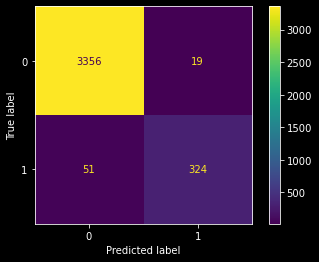

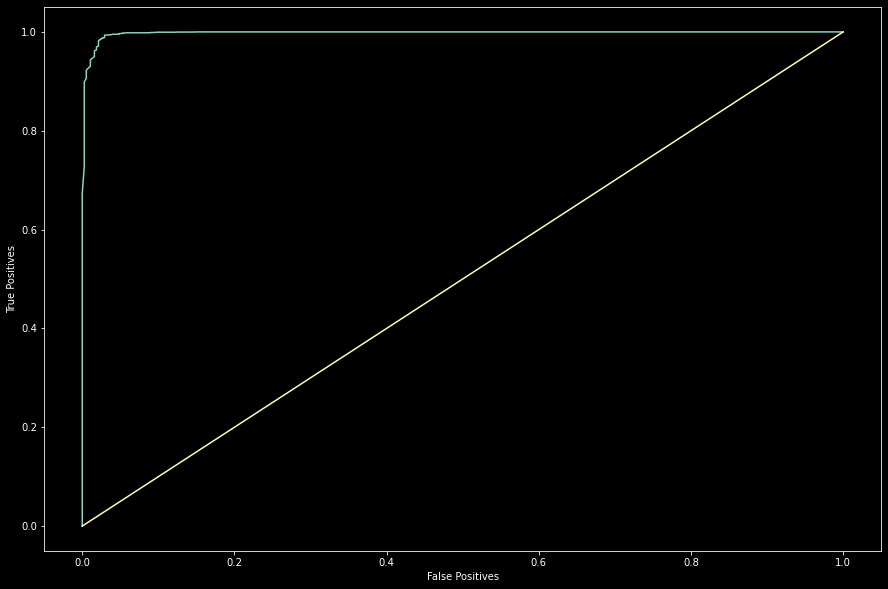

In [7]:
random_eval.confusion_matrix()
random_eval.roc_curves()
random_eval.main_metrics()

<h4>KNN Eval</h4>

,precision,recall,F1,ROC AUC
0,0.77,0.96,0.85,0.96


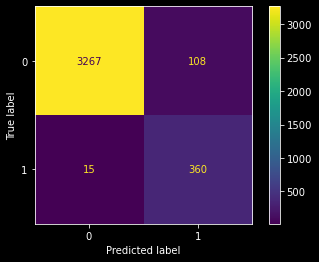

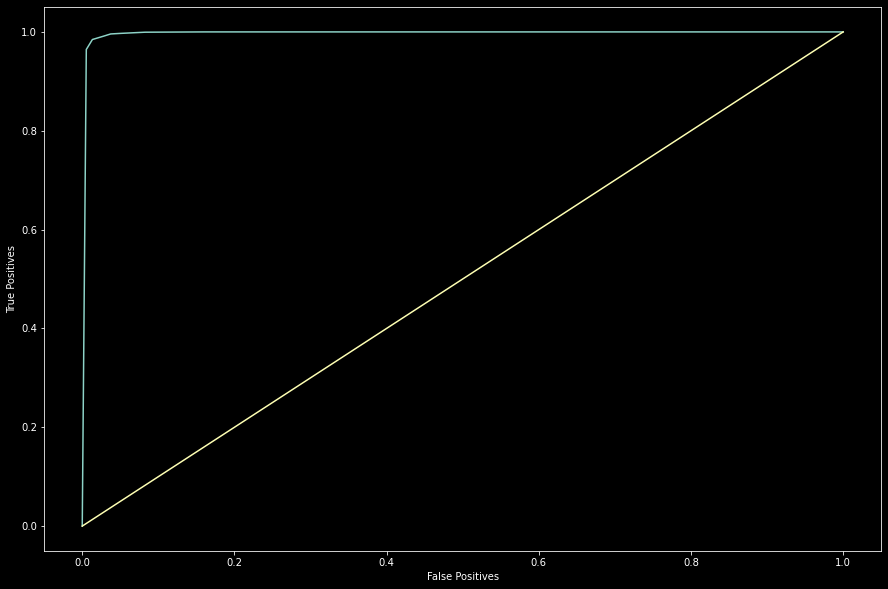

In [8]:
knn_eval = helper.classificationEval(y_train, y_pred_knn, y_prob_knn)
knn_eval.confusion_matrix()
knn_eval.roc_curves()
knn_eval.main_metrics()

<h4> SGD Eval </h4>

,precision,recall,F1,ROC AUC
0,0.93,0.86,0.89,0.93


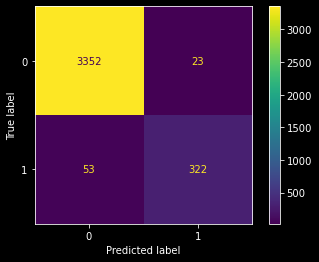

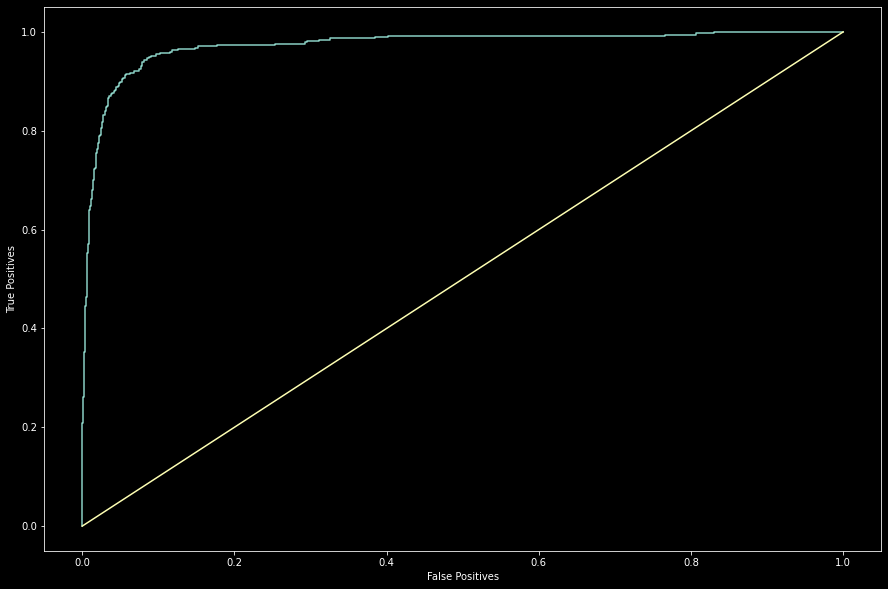

In [9]:
sgd_eval = helper.classificationEval(y_train, y_pred_sgd, y_prob_sgd)
sgd_eval.confusion_matrix()
sgd_eval.roc_curves(inverted = True)
sgd_eval.main_metrics()

In [10]:
#Random forest seems to be the best model, so we will use it to predict on the test set
x_test_prepared = helper.data_pipeline.fit_transform(x_test)
random_forest_scores = cross_val_score(random_forest, x_test_prepared, y_test, cv = 5)
random_forest_preds = cross_val_predict(random_forest, x_test_prepared, y_test, cv = 5)

In [11]:
random_test_eval = helper.classificationEval(y_test, random_forest_preds, None)

In [12]:
random_test_eval.main_metrics()

,precision,recall,F1,ROC AUC
0,0.81,0.71,0.76,0.85


In [13]:
#The model lost a bit of recall on the test set, although its precision has increased
#For this exercise, the results are good enough